In [6]:
%matplotlib inline

%reload_ext autoreload
%autoreload 2

import keras

from keras_retinanet.models import retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color


import matplotlib.pyplot as plt
import cv2
import sys
import os
import numpy as np
import time
import json
from random import shuffle

import tensorflow as tf

def get_session():
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.compat.v1.Session(config=config)

tf.compat.v1.keras.backend.set_session(get_session())

In [7]:
sys.path.insert(0, '../keras-retinanet/keras_retinanet')
from utils.gpu import setup_gpu

# use this to change which GPU to use
gpu = '1'

# set the modified tf session as backend in keras
setup_gpu(gpu)

In [9]:
#model1 is trained on all of the tiles
model_path1 = '../Data/final_model_harbor_seal_beach_only_best.h5'
model1 = models.load_model(model_path1, backbone_name='resnet50')

#print(model1.summary())

labels_to_names = {0: 'seal'}

In [10]:
#model2 is trained on only "beach" tiles
model_path2 = '../Data/final_model_harbor_seal_first_run_full_data.h5'
model2 = models.load_model(model_path2, backbone_name='resnet50')

#print(model2.summary())

In [11]:
image_dir1 = '../Images/Harbor_Seals_Full_Data/'
image_dir2 = "../Images/Harbor_Seals_Beach_Only/"

In [12]:
image_list = ['../Images/Harbor_Seals_Beach_Only/3_27_15_hs_5---35.png',
             '../Images/Harbor_Seals_Beach_Only/3_27_15_hs_9---35.png',
             '../Images/Harbor_Seals_Beach_Only/4_20_13_hs_1---86.png',
             '../Images/Harbor_Seals_Beach_Only/3_27_15_hs_6---45.png',
             '../Images/Harbor_Seals_Beach_Only/4_20_13_hs_3---3.png',
             '../Images/Harbor_Seals_Beach_Only/5_6_12_hs_6---97.png'
             ]

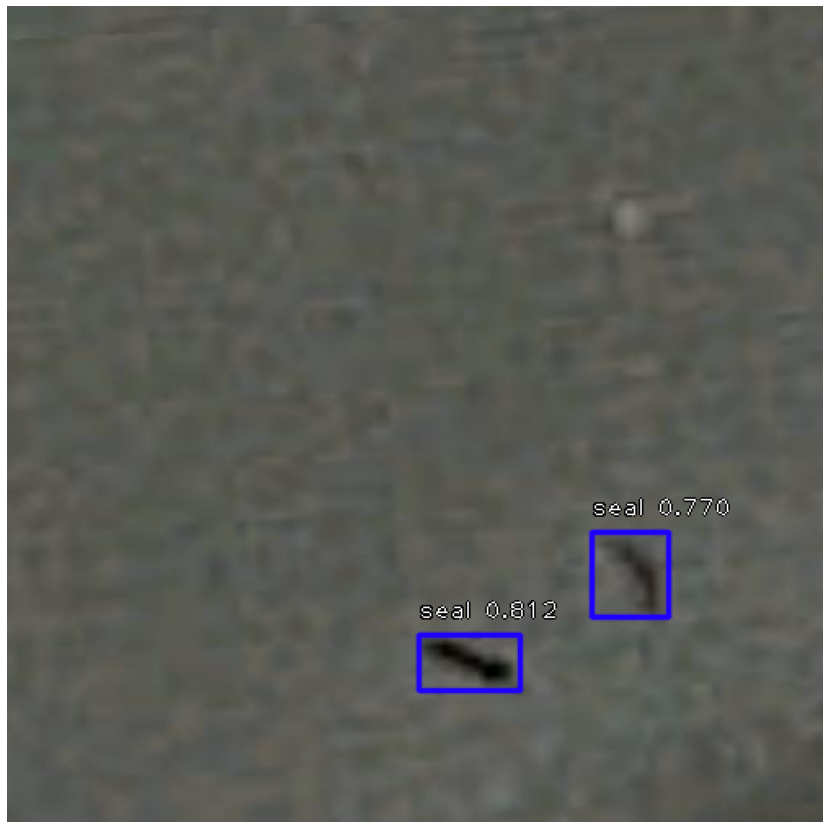

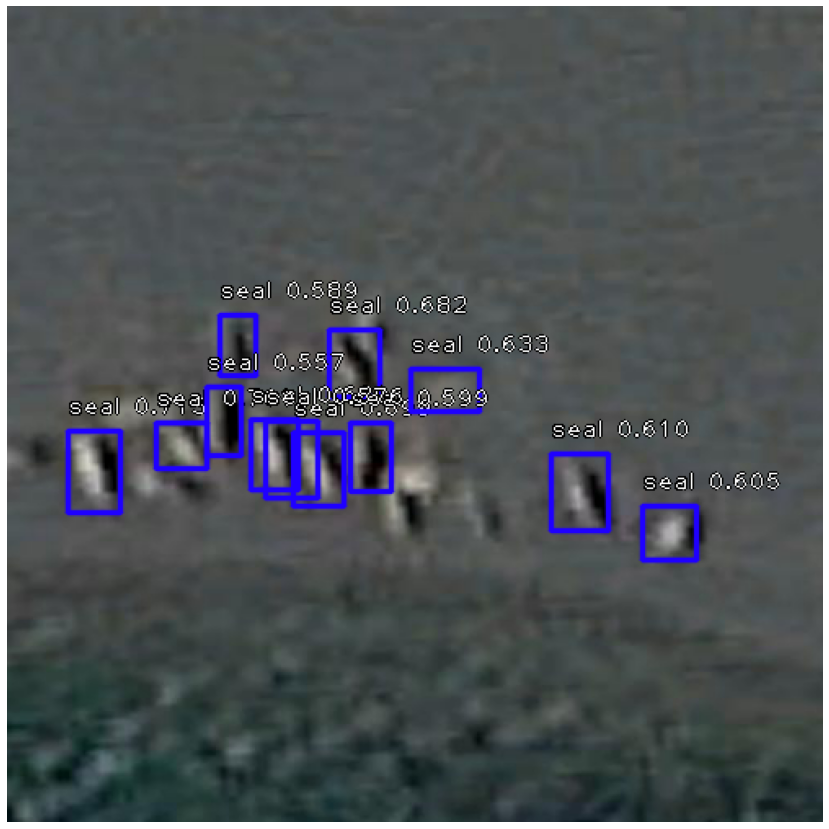

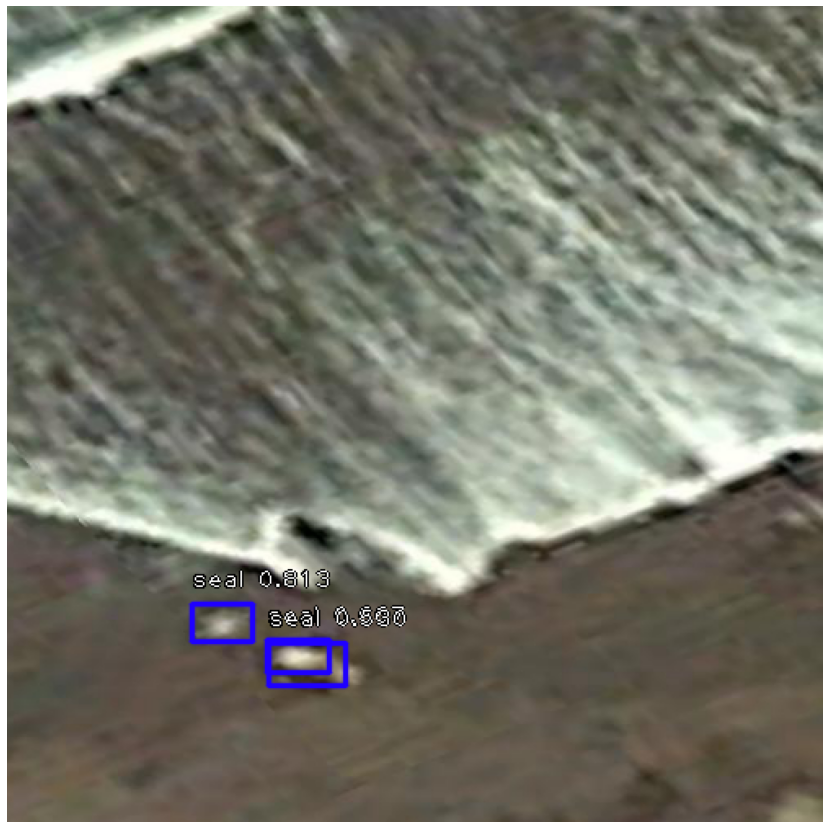

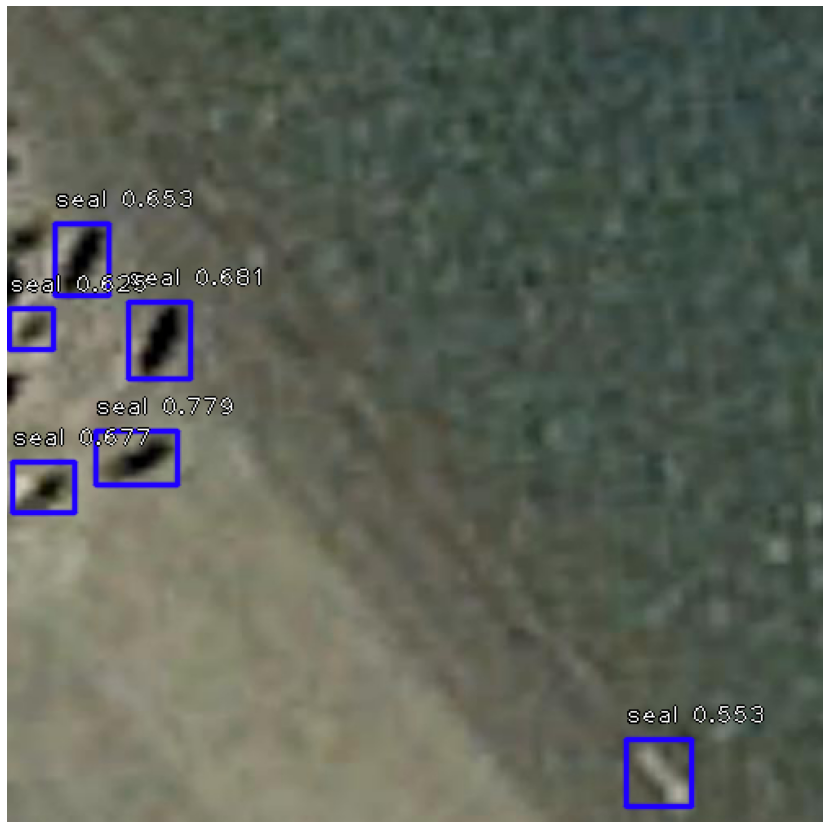

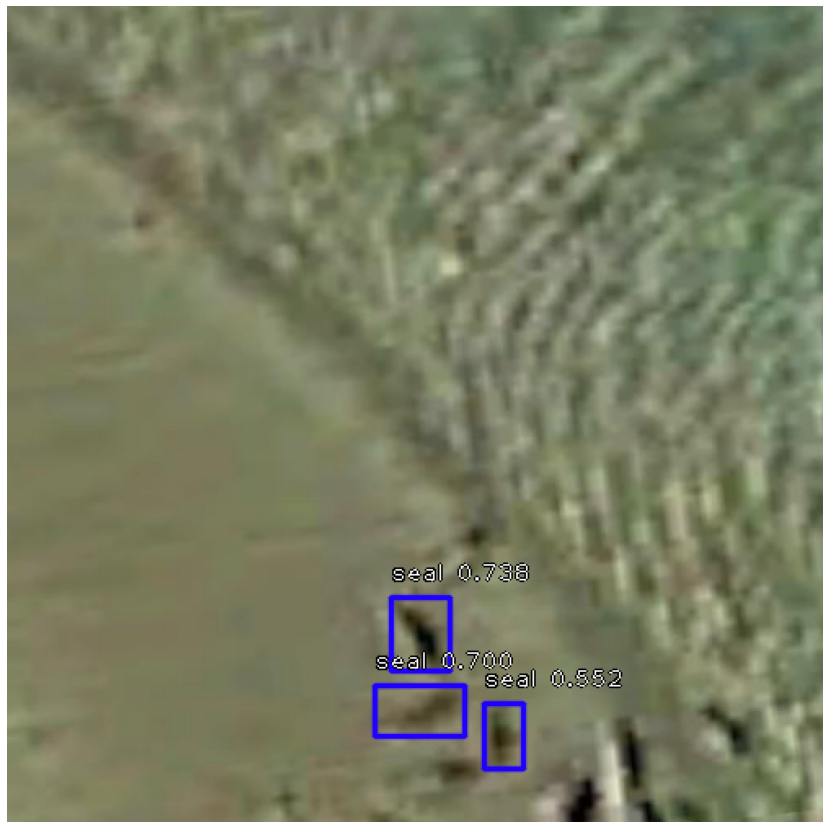

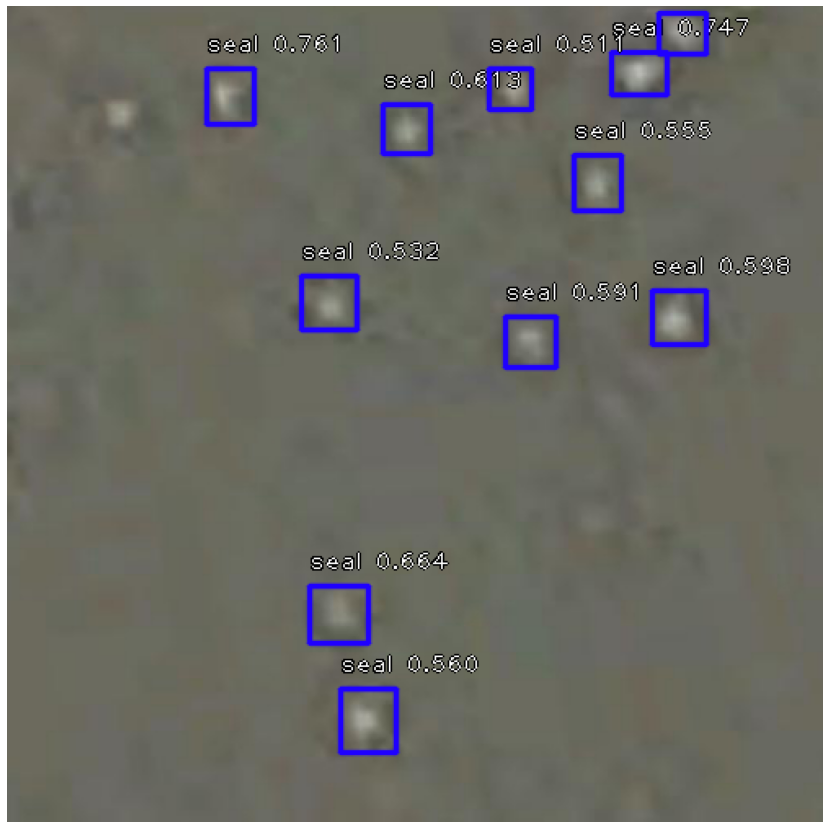

NameError: name 'image_list1' is not defined

In [13]:
visualize = True
min_score = 0.5

detections1 = {}

total_time = 0

for image_path in image_list: 
    im_name = image_path.split('/')[-1].split('.')[0] + '_output'

    image = read_image_bgr(image_path)
    
    if visualize:
        draw = image.copy()
        draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
        
    image = preprocess_image(image)
    image, scale = resize_image(image)
    
    start = time.time()
    boxes, scores, labels = model1.predict_on_batch(np.expand_dims(image, axis=0))
    total_time += time.time() - start 
    
    boxes /= scale
    if any(score >= min_score for score in scores [0]):
        detections1[image_path] = []
    
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < min_score:
            break
        
        b = box.astype(int)
        detections1[image_path].append({"box" : b, "label" : label, "score" : score})
        
        if visualize: 
            color = label_color(label)
            
            draw_box(draw, b, color=color)
            
            caption = "{} {:.3f}".format(labels_to_names[label], score)
            draw_caption(draw, b, caption)
            
    if any(score >= min_score for score in scores[0]):
        if visualize:
            plt.figure(figsize=(15, 15))
            plt.axis('off')
            plt.imshow(draw)
            plt.savefig(im_name + 'beach.png')
            plt.show()
    else:
        print(image_path, "has no seal annotations")
print("Finished, time per image:", total_time/len(image_list))

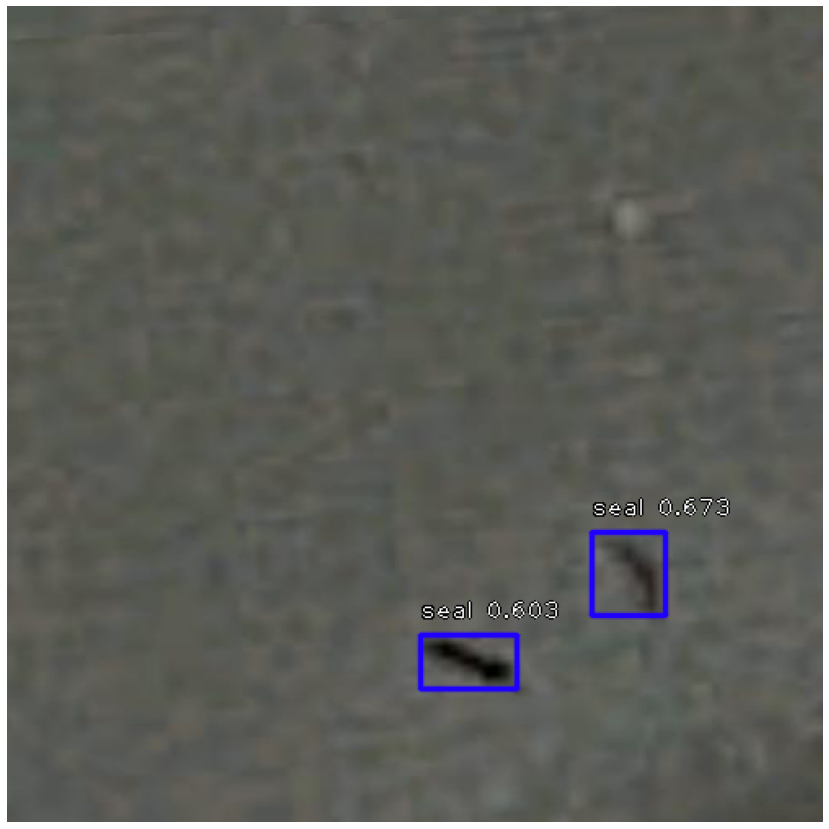

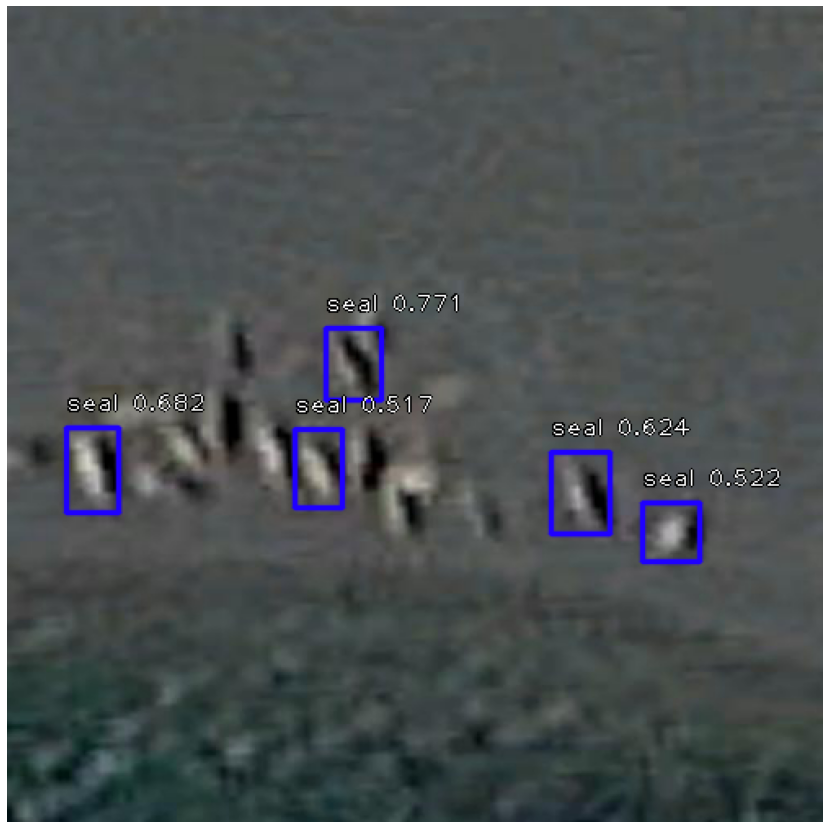

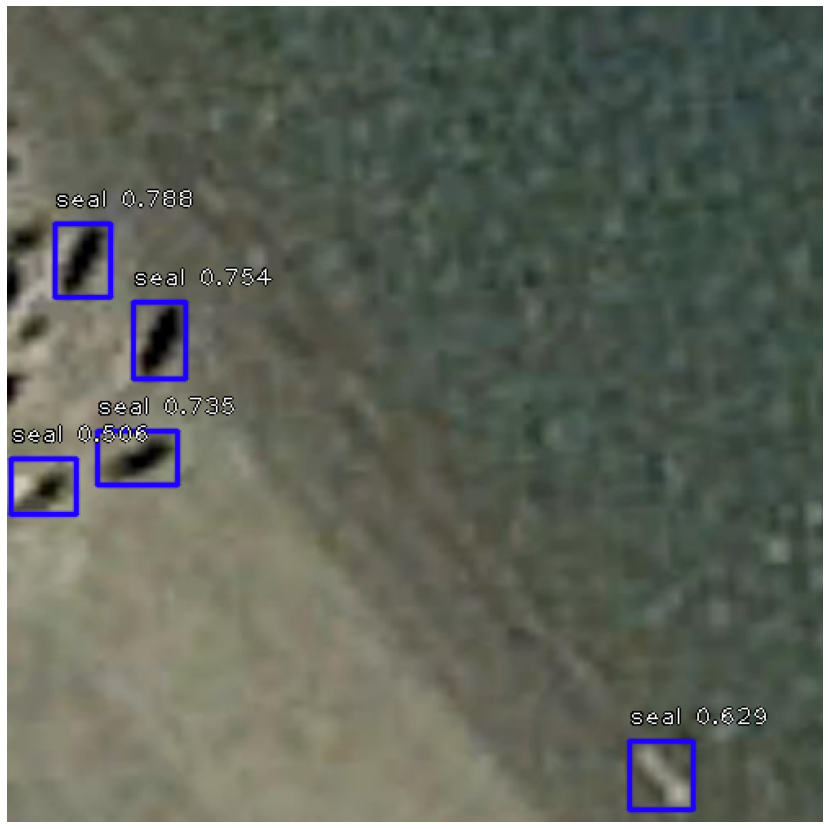

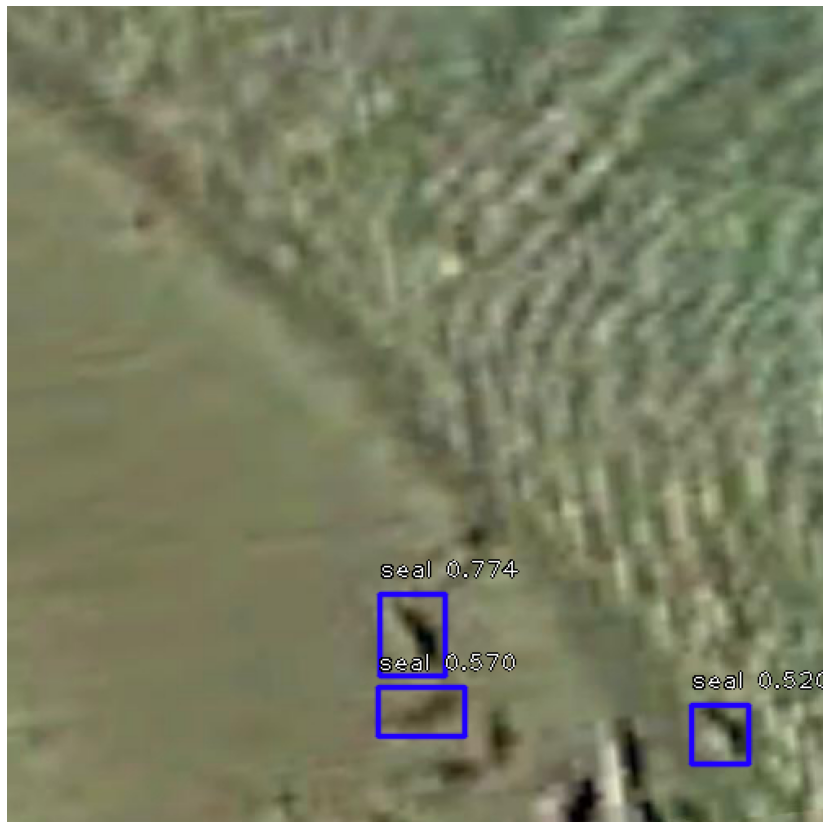

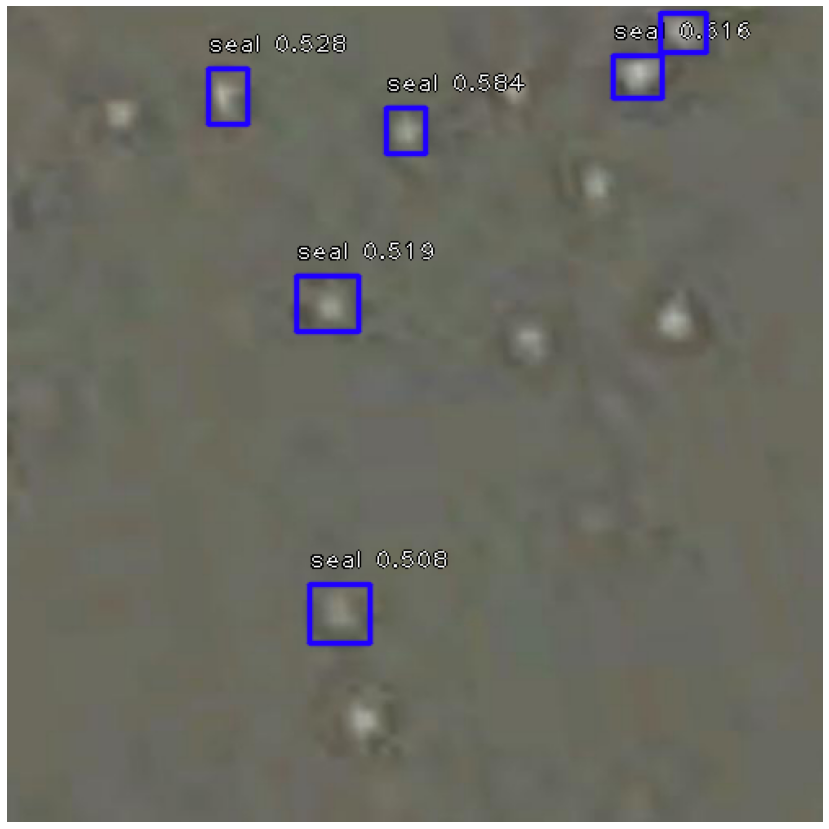

Finished, time per image: 3.2636281649271646


In [15]:
min_score = 0.5

detections1 = {}

total_time = 0

for image_path in image_list: 
    im_name = image_path.split('/')[-1].split('.')[0] + '_output'

    image = read_image_bgr(image_path)
    
    if visualize:
        draw = image.copy()
        draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
        
    image = preprocess_image(image)
    image, scale = resize_image(image)
    
    start = time.time()
    boxes, scores, labels = model2.predict_on_batch(np.expand_dims(image, axis=0))
    total_time += time.time() - start 
    
    boxes /= scale
    if any(score >= min_score for score in scores [0]):
        detections1[image_path] = []
    
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < min_score:
            break
        
        b = box.astype(int)
        detections1[image_path].append({"box" : b, "label" : label, "score" : score})
        
        if visualize: 
            color = label_color(label)
            
            draw_box(draw, b, color=color)
            
            caption = "{} {:.3f}".format(labels_to_names[label], score)
            draw_caption(draw, b, caption)
            
    if any(score >= min_score for score in scores[0]):
        if visualize:
            plt.figure(figsize=(15, 15))
            plt.axis('off')
            plt.imshow(draw)
            plt.savefig(im_name + 'full.png')
            plt.show()
            
print("Finished, time per image:", total_time/len(image_list))